In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip -qq "/content/drive/MyDrive/Dataset/dog and cat/test1.zip"
!unzip -qq "/content/drive/MyDrive/Dataset/dog and cat/train.zip"

In [4]:
import os, shutil
import pandas as pd
from keras import layers
from keras import models
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tqdm import tqdm
import numpy as np
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import ModelCheckpoint, EarlyStopping
import cv2

In [5]:
# graph function
def graph():
    plt.figure(figsize = (12,4))
    
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], 'b-', label = 'loss')
    plt.plot(history.history['val_loss'], 'y--', label = 'val_loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['acc'], 'g-', label = 'acc')
    plt.plot(history.history['val_acc'], 'r--', label = 'val_acc')
    plt.xlabel('Epoch')
    # plt.ylim([0.7, 1])
    plt.legend()

    return plt.show()

Data preprocessing

In [6]:
cd '/content/drive/MyDrive/Dataset/dog and cat/new'

/content/drive/MyDrive/Dataset/dog and cat/new


In [7]:
original_dataset_dir = '/content/drive/MyDrive/Dataset/dog and cat/train'
base_dir = '/content/drive/MyDrive/Dataset/dog and cat/new'

In [8]:
# The path to the directory where the original
# dataset was uncompressed
# os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

#train folder
train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

#validation folder
validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

#test folder
test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)


# # Copy first 1000 cat images to train_cats_dir
# fnames = ['cat.{}.jpg'.format(i) for i in range(5000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_cats_dir, fname)
#     shutil.copyfile(src, dst)
# # Copy next 500 cat images to validation_cats_dir
# fnames = ['cat.{}.jpg'.format(i) for i in range(5000, 6000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_cats_dir, fname)
#     shutil.copyfile(src, dst)
# # Copy next 500 cat images to test_cats_dir
# fnames = ['cat.{}.jpg'.format(i) for i in range(6000, 6500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_cats_dir, fname)
#     shutil.copyfile(src, dst)


# # Copy first dog images to train_dogs_dir
# fnames = ['dog.{}.jpg'.format(i) for i in range(5000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_dogs_dir, fname)
#     shutil.copyfile(src, dst)
# # Copy next dog images to validation_dogs_dir
# fnames = ['dog.{}.jpg'.format(i) for i in range(5000, 6000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_dogs_dir, fname)
#     shutil.copyfile(src, dst)
# # Copy next dog images to test_dogs_dir
# fnames = ['dog.{}.jpg'.format(i) for i in range(6000, 6500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [9]:
# Check number of data
print('total training cat images:', len(os.listdir("./train/cats")))
print('total training dog images:', len(os.listdir("./train/dogs")))
print('total validation cat images:', len(os.listdir("./validation/dogs")))
print('total validation dog images:', len(os.listdir("./validation/cats")))
print('total test cat images:', len(os.listdir("./test/dogs")))
print('total test dog images:', len(os.listdir("./test/dogs")))

total training cat images: 5000
total training dog images: 5000
total validation cat images: 1000
total validation dog images: 1000
total test cat images: 500
total test dog images: 500


In [85]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Baseline(CNN)

**Loss / Acc = [0.40944916009902954, 0.8059999942779541]**

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [11]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [12]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 418s 4s/step - loss: 0.6829 - acc: 0.5425 - val_loss: 0.6591 - val_acc: 0.6080
Epoch 2/30
100/100 [==============================] - 275s 3s/step - loss: 0.6591 - acc: 0.5920 - val_loss: 0.6350 - val_acc: 0.6470
Epoch 3/30
100/100 [==============================] - 206s 2s/step - loss: 0.6336 - acc: 0.6415 - val_loss: 0.6058 - val_acc: 0.6860
Epoch 4/30
100/100 [==============================] - 153s 2s/step - loss: 0.6099 - acc: 0.6660 - val_loss: 0.5596 - val_acc: 0.7170
Epoch 5/30
100/100 [==============================] - 122s 1s/step - loss: 0.5781 - acc: 0.6905 - val_loss: 0.5557 - val_acc: 0.7360
Epoch 6/30
100/100 [==============================] - 101s 1s/step - loss: 0.5613 - acc: 0.7080 - val_loss: 0.5351 - val_acc: 0.7380
Epoch 7/30
100/100 [==============================] - 93s 935ms/step - loss: 0.5633 - acc: 0.7100 - val_loss: 0.5600 - val_acc: 0.7060
Epoch 8/30
100/100 [==============================] - 69s 691ms/ste

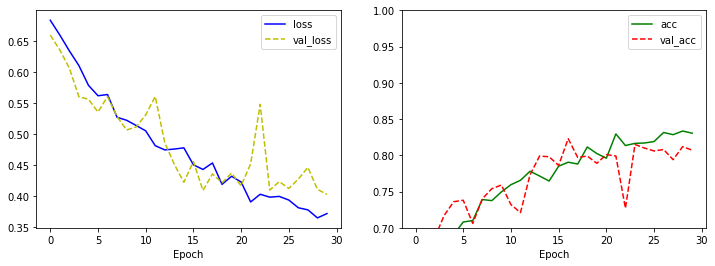

In [22]:
graph()

In [18]:
model.evaluate(test_generator)

50/50 [==============================] - 135s 3s/step - loss: 0.4094 - acc: 0.8060


[0.40944916009902954, 0.8059999942779541]

# Base line + Data augmentation
**Loss / Acc = [0.3270914852619171, 0.8569999933242798]**

In [25]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

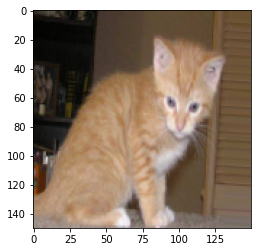

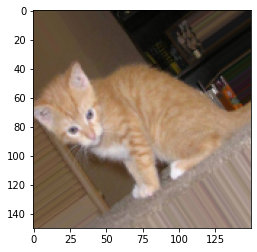

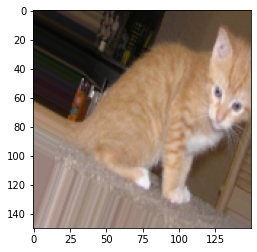

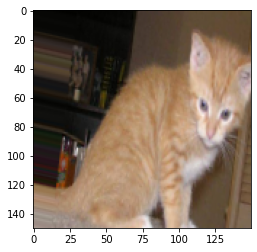

In [43]:
# This is module with image preprocessing utilities
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
# We pick one image to "augment"
img_path = fnames[3]
# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))
# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)
# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)
# The .flow() command below generates batches of randomly transformed images. 
# It will loop indefinitely, so we need to `break` the loop at some point! 
i= 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 934s 9s/step - loss: 0.6914 - acc: 0.5138 - val_loss: 0.6817 - val_acc: 0.5575
Epoch 2/100
100/100 [==============================] - 514s 5s/step - loss: 0.6743 - acc: 0.5776 - val_loss: 0.6868 - val_acc: 0.5587
Epoch 3/100
100/100 [==============================] - 359s 4s/step - loss: 0.6652 - acc: 0.5913 - val_loss: 0.7749 - val_acc: 0.5031
Epoch 4/100
100/100 [==============================] - 275s 3s/step - loss: 0.6485 - acc: 0.6149 - val_loss: 0.6487 - val_acc: 0.6150
Epoch 5/100
100/100 [==============================] - 217s 2s/step - loss: 0.6396 - acc: 0.6372 - val_loss: 0.6693 - val_acc: 0.5875
Epoch 6/100
100/100 [==============================] - 201s 2s/step - loss: 0.6314 - acc: 0.6294 - val_loss: 0.6907 - val_acc: 0.5925
Epoch 7/100
100/100 [==============================] - 194s 2s/step - loss: 0.6121 - acc: 0.6641 - val_loss: 0.6130 - val_acc: 0.6431
Epoch 8/100
100/100 [==============================] - 190s 2s

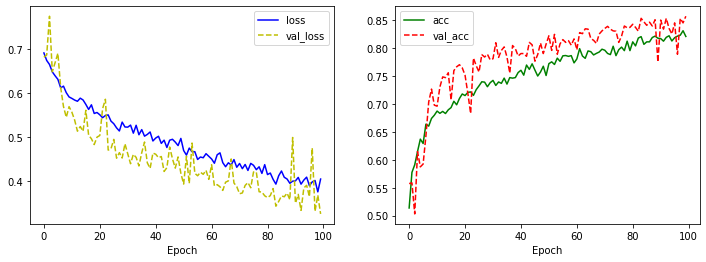

32/32 [==============================] - 219s 7s/step - loss: 0.3271 - acc: 0.8570


[0.3270914852619171, 0.8569999933242798]

In [11]:
graph()
model.evaluate(test_generator)

# Used pretrained model(Densenet)

**Loss / Acc = [0.053897496312856674, 0.9833984375]**

In [10]:
feature_model = keras.applications.DenseNet201(input_shape=(224,224,3), weights="imagenet", include_top=False)
feature_model.trainable= False

74850304/74836368 [==============================] - 1s 0us/step


In [ ]:
feature_model.summary()

In [12]:
image_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    batch_size = batch_size,
                                                    seed = 0,
                                                    shuffle = True,
                                                    class_mode = 'binary',
                                                    target_size = (image_size,image_size))

valid_generator = train_datagen.flow_from_directory(directory = validation_dir,
                                                    batch_size = batch_size,
                                                    seed = 0,
                                                    shuffle = True,
                                                    class_mode = 'binary',
                                                    target_size = (image_size,image_size))

test_generator = train_datagen.flow_from_directory(directory = test_dir,
                                                    batch_size = batch_size,
                                                    seed = 0,
                                                    class_mode = 'binary',
                                                    target_size = (image_size,image_size))


Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
#feature extract 
batch_step = 32
train_features = [] 
train_Y = [] 

for idx in tqdm(range(batch_step)):
  x, y = train_generator.next()
  train_Y.extend(y) 

  feature = feature_model.predict(x)
  train_features.extend(feature)

#Change to array
train_features = np.array(train_features)
train_Y = np.array(train_Y)

print(train_features.shape)
print(train_Y.shape)
print(train_Y)

100%|██████████| 32/32 [03:40<00:00,  6.89s/it]

(1024, 7, 7, 1920)
(1024,)
[1. 0. 0. ... 0. 1. 0.]


In [15]:
valid_features = [] 
valid_Y = [] 

batch_step = 32

for idx in tqdm(range(batch_step)):
    
    x, y = valid_generator.next()
    valid_Y.extend(y)
  
    feature = feature_model.predict(x)
    valid_features.extend(feature)

valid_features = np.array(valid_features)
valid_Y = np.array(valid_Y)

print(valid_features.shape)
print(valid_Y.shape)

100%|██████████| 32/32 [03:02<00:00,  5.71s/it]

(1024, 7, 7, 1920)
(1024,)


In [76]:
def build_model(feature_model):
    
    inputs = Input(shape=feature_model.output.shape[1:])
    
    x = GlobalAveragePooling2D()(inputs)
    x = BatchNormalization()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    outputs = Dense(1, activation='sigmoid', name='output')(x)

    model = Model(inputs=inputs, outputs = outputs)
    
    init_lr = 0.0001
    opt = Adam(lr=init_lr)
    model.compile(optimizer=opt, 
                  loss= 'binary_crossentropy',
                  metrics='acc')
    
    
    return model

In [77]:
model = build_model(feature_model)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 7, 7, 1920)]      0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1920)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1920)              7680      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               245888    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 129       
Total params: 253,697
Trainable params: 249,857
Non-trainable params: 3,840
_________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [78]:
checkpoint_path = '/content/drive/My Drive/check.h5'

cp = ModelCheckpoint(filepath=checkpoint_path,
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_acc',
                                verbose=1)

es = EarlyStopping(patience=20, verbose=1)
history = model.fit(train_features, train_Y, 
                    validation_data=(valid_features, valid_Y),
                    epochs = 100,
                    batch_size = 32,
                    callbacks=[es,cp])
model.summary()

Epoch 1/100
32/32 [==============================] - 1s 23ms/step - loss: 0.4574 - acc: 0.7969 - val_loss: 0.3112 - val_acc: 0.9385

Epoch 00001: val_acc improved from -inf to 0.93848, saving model to /content/drive/My Drive/check.h5
Epoch 2/100
32/32 [==============================] - 0s 15ms/step - loss: 0.1635 - acc: 0.9521 - val_loss: 0.1824 - val_acc: 0.9668

Epoch 00002: val_acc improved from 0.93848 to 0.96680, saving model to /content/drive/My Drive/check.h5
Epoch 3/100
32/32 [==============================] - 0s 14ms/step - loss: 0.1094 - acc: 0.9629 - val_loss: 0.1316 - val_acc: 0.9727

Epoch 00003: val_acc improved from 0.96680 to 0.97266, saving model to /content/drive/My Drive/check.h5
Epoch 4/100
32/32 [==============================] - 0s 15ms/step - loss: 0.0933 - acc: 0.9746 - val_loss: 0.1047 - val_acc: 0.9727

Epoch 00004: val_acc did not improve from 0.97266
Epoch 5/100
32/32 [==============================] - 0s 15ms/step - loss: 0.0624 - acc: 0.9844 - val_loss: 0.

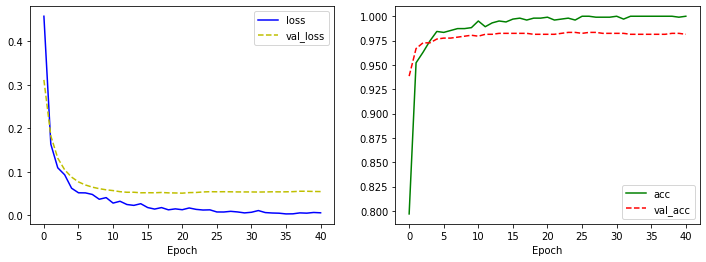

In [79]:
graph()

In [93]:
model.load_weights(checkpoint_path)
model.evaluate(valid_features, valid_Y)

32/32 [==============================] - 0s 7ms/step - loss: 0.0539 - acc: 0.9834


[0.053897496312856674, 0.9833984375]

###Check result

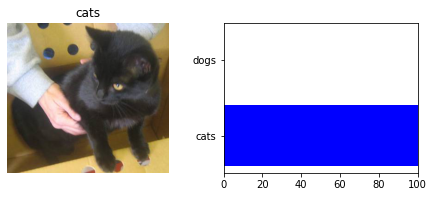

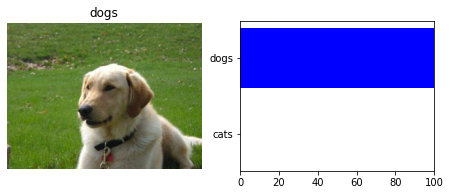

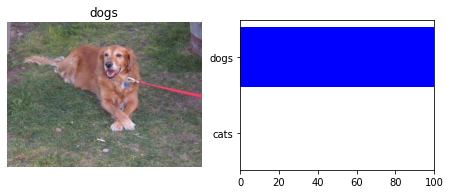

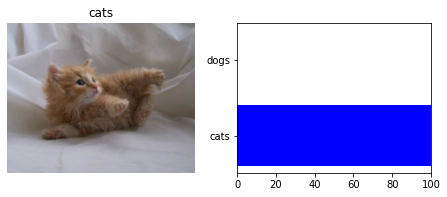

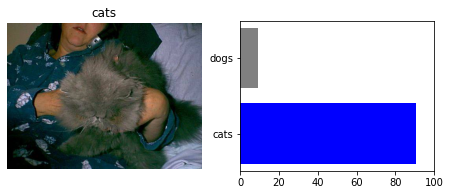

In [104]:
import random
real_Y = []
real_Y_index =[]
predict_Y =[]
unique_sorted_Y =['cats','dogs']

for i in range(5): 
    image_path = random.choice(valid_generator.filepaths) 
    
    plt.figure(figsize=(16,16))
    plt.subplot(5,4,i*4+1)
    plt.imshow(plt.imread(image_path))

    real_y = image_path.split('/')[8]
    real_Y.append(real_y)

    plt.title(real_y)
    plt.axis('off')

    idx = unique_sorted_Y.index(real_y)
    real_Y_index.append(idx)

    plt.subplot(5,4,i * 4+2)
    plt.xlim([0, 100])   

    
    img = cv2.imread(image_path)
    img = cv2.resize(img, dsize=(image_size,image_size))
    img = img / 255.0

    img = np.expand_dims(img, axis=0)

    feature_vector = feature_model.predict(img)

    prediction = model.predict(feature_vector)[0]

    color = ['gray'] * 2
    if prediction <= 0.5:
        predict = 0
        color[0] = 'blue'
    else:
        predict = 1
        color[1] = 'blue'

    covid_ratio = float(1-prediction)
    non_ration = float(prediction)

    ratio = np.zeros(2)
    ratio[0] = covid_ratio
    ratio[1] = non_ration

    #가로 막대 그리기 
    plt.barh(range(2), ratio * 100, color = color)
    plt.yticks(range(2), unique_sorted_Y)

    # print(labels[0], realY[0])
    predictY.append(label)
    realY.append(real_y)
    plt.show()